### Linear Regression Model to Predict Future Year Prices (selecting from all features)
#### Read in all merged csv data files

In [21]:
import pandas as pd
import glob
import os

path = r'../data/curated/merged_dataset/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

merged_df = pd.concat(li, axis=0, ignore_index=True)
merged_df.drop(['address', 'latitude', 'longitude', 'postcode', 'sa2_2016'], axis=1, inplace=True)
merged_df.groupby(['year', 'sa2_2021', 'nbed', 'nbath', 'ncar'], as_index=False).agg({'weekly_rent': 'mean'})

year   sa2_2021  nbed  nbath  ncar  weekly_rent
0      2013  201011001   2.0    1.0     2   175.000000
1      2013  201011001   2.0    2.0     1   232.000000
2      2013  201011001   3.0    1.0     1   250.000000
3      2013  201011001   3.0    2.0     2   260.000000
4      2013  201011001   4.0    2.0     2   349.333333
...     ...        ...   ...    ...   ...          ...
52397  2022  217041480   4.0    1.0     2   400.000000
52398  2022  217041480   4.0    2.0     1   488.000000
52399  2022  217041480   4.0    2.0     2   537.857143
52400  2022  217041480   4.0    2.0     3   550.000000
52401  2022  217041480   5.0    2.0     2   650.000000

[52402 rows x 6 columns]

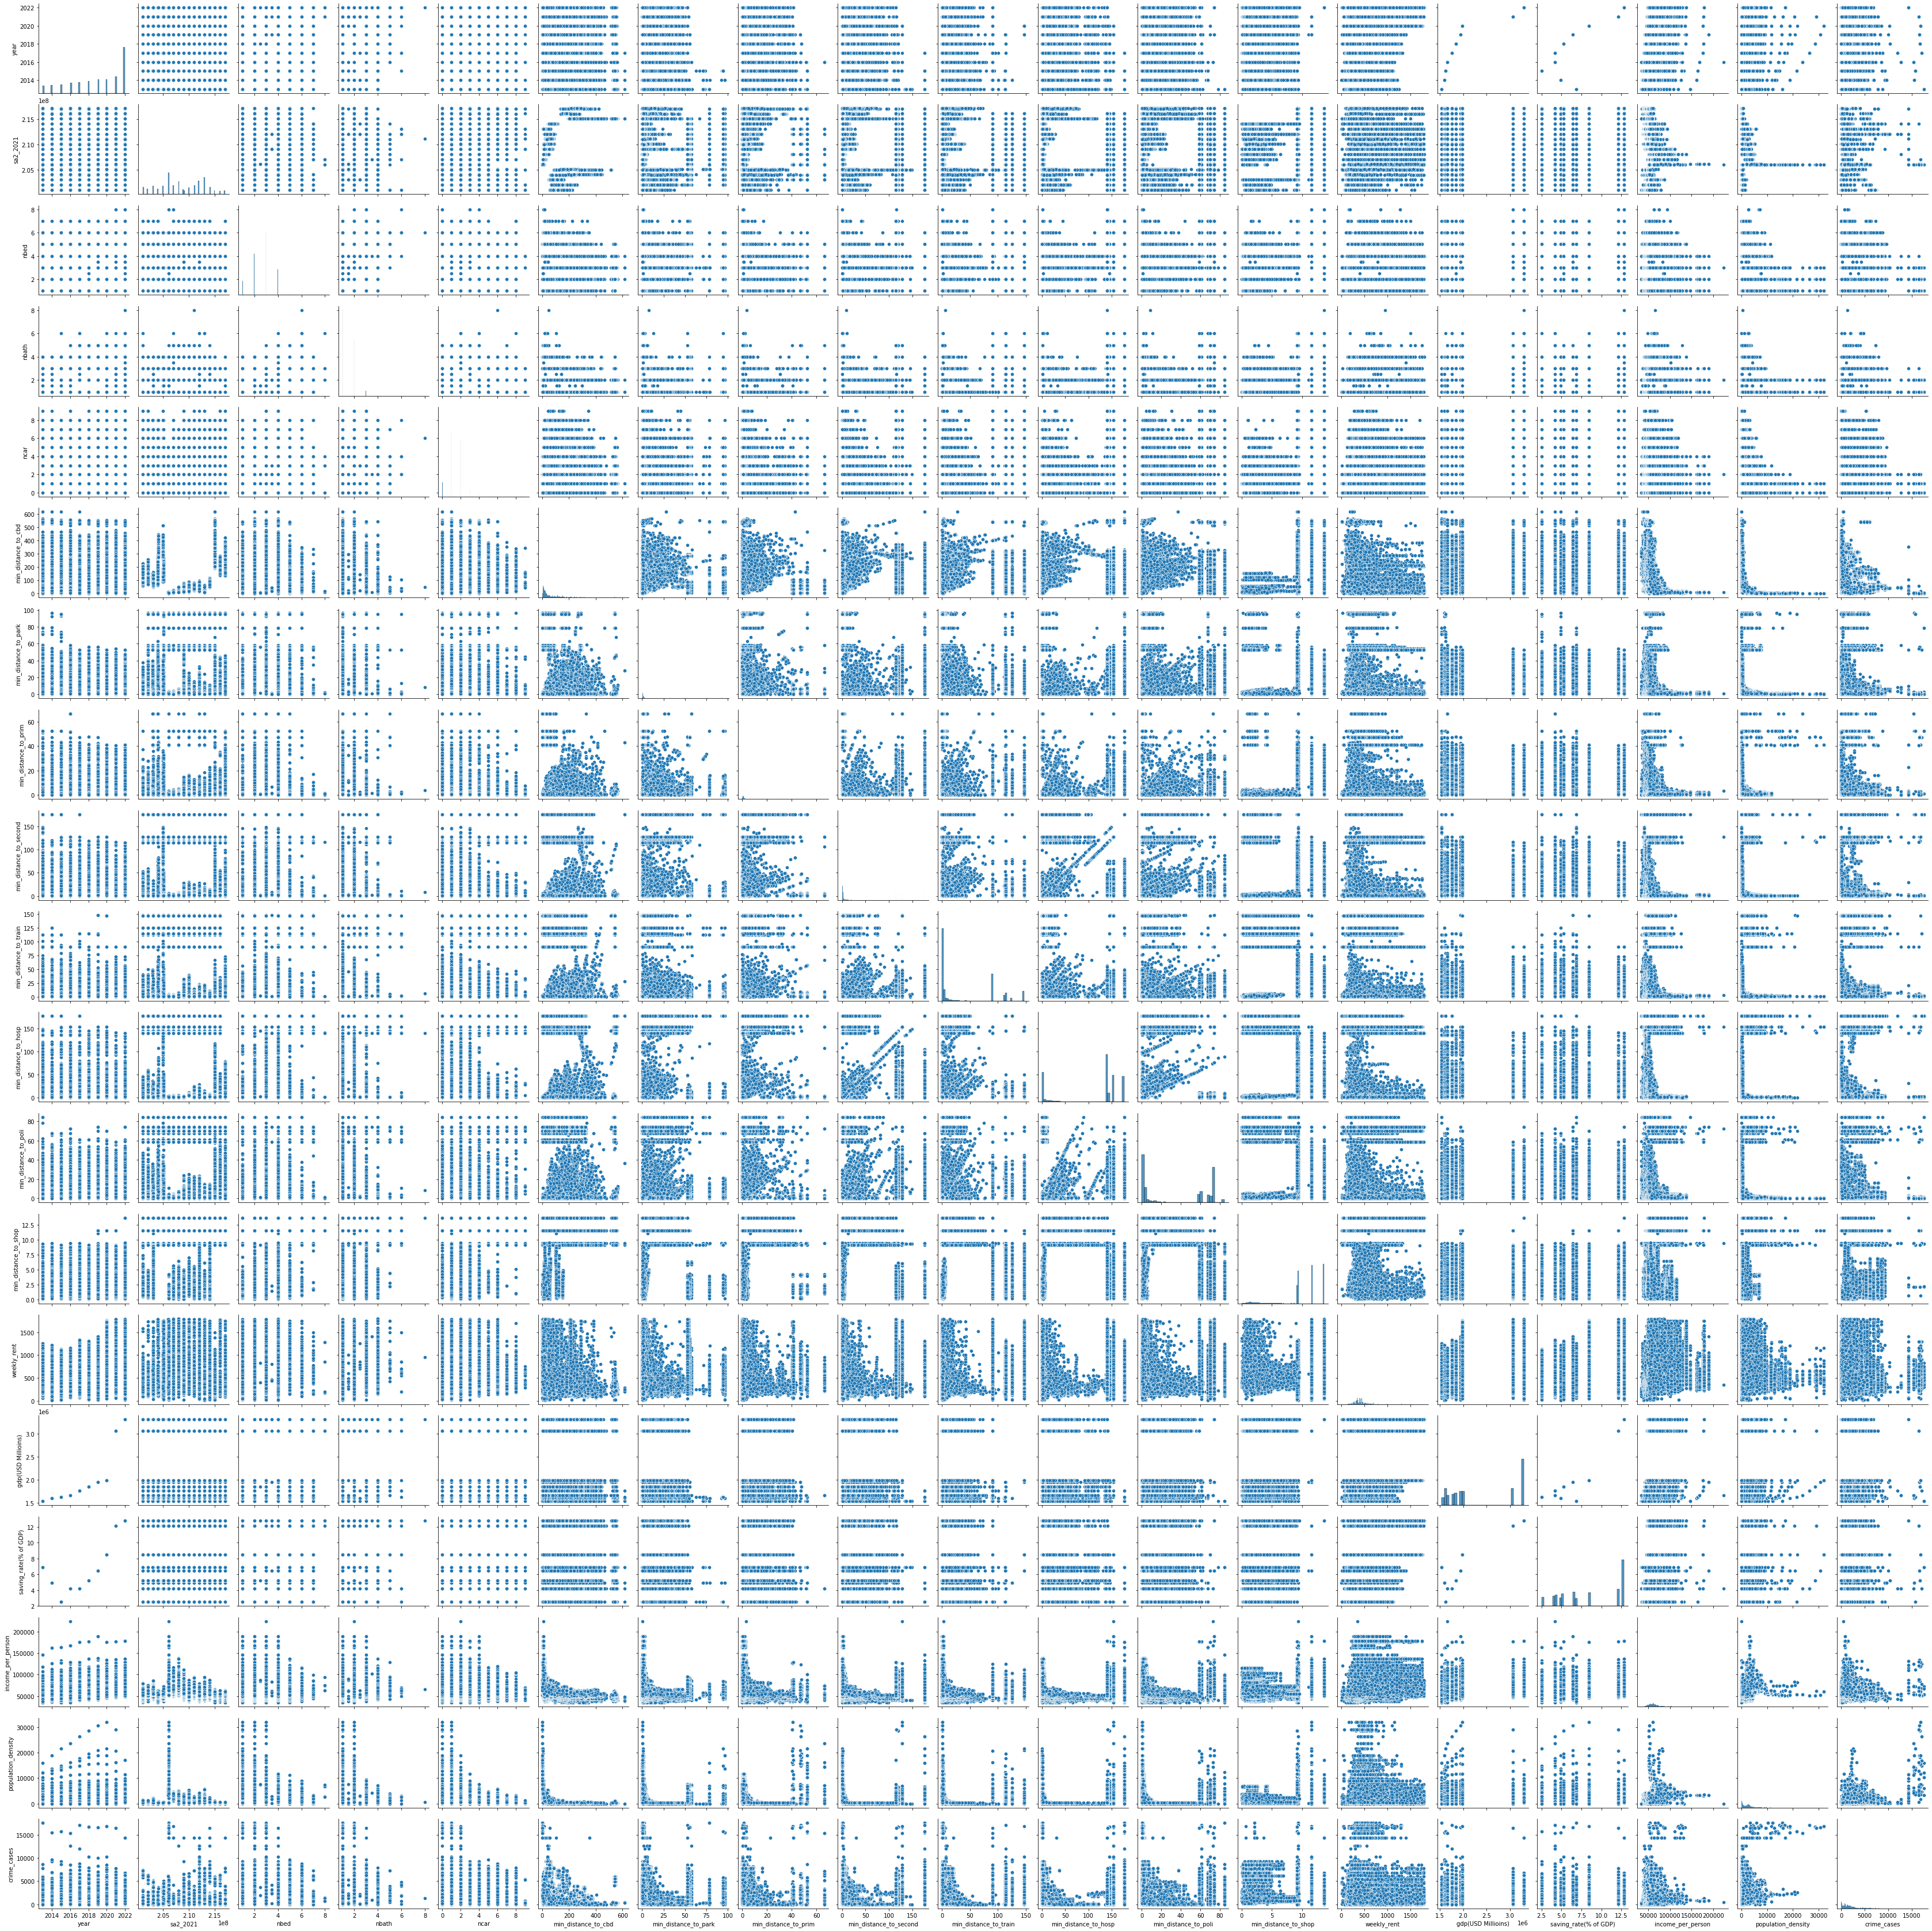

In [2]:
import seaborn as sns
sns.pairplot(merged_df)

In [13]:
print(merged_df.columns)
#pd.get_dummies(merged_df['sa2_2021'])
merged_df.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)
merged_df = pd.get_dummies(data=merged_df, columns=['sa2_2021'], prefix='sa2')
merged_df = pd.get_dummies(data=merged_df, columns=['residence_type'], prefix='resiType') 
#merged_df.drop(['sa2_2021', 'residence_type'], axis=1, inplace=True)
merged_df.dropna(inplace=True)

y = merged_df['weekly_rent']
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(merged_df.isna().sum())
X = merged_df.drop(['weekly_rent'], axis=1)
X

Index(['year', 'sa2_2021', 'residence_type', 'nbed', 'nbath', 'ncar',
       'min_distance_to_cbd', 'min_distance_to_park', 'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp', 'min_distance_to_poli', 'min_distance_to_shop',
       'weekly_rent', 'gdp(USD Millioins)', 'saving_rate(% of GDP)',
       'income_per_person', 'population_density', 'crime_cases'],
      dtype='object')


year  nbed  nbath  ncar  min_distance_to_cbd  min_distance_to_park  \
0       2013   2.0    1.0     0            227.97163              23.16035   
1       2013   2.0    1.0     0            223.66084               5.71742   
2       2013   2.0    1.0     0            243.25680               5.11222   
3       2013   4.0    2.0     0            140.35827              78.32509   
4       2013   1.0    1.0     0             13.86135               0.93250   
...      ...   ...    ...   ...                  ...                   ...   
172030  2022   3.0    1.0     1            293.28053               0.56012   
172031  2022   3.0    2.0     2            258.29111               3.49087   
172032  2022   2.0    2.0     1              9.47077               2.45011   
172033  2022   1.0    1.0     1              1.84933               0.65199   
172034  2022   1.0    1.0     1              4.58626               0.48042   

        min_distance_to_prim  min_distance_to_second  min_distance_to_train  \
0                    7.35747                16.96507               35.56825   
1                    6.50536                 6.76794                7.54355   
2                    0.20027                36.72106               50.85341   
3                   10.66523                11.91899               11.26906   
4                    1.32931                 3.49174                2.20800   
...                      ...                     ...                    ...   
172030               1.21809               114.77016               90.08591   
172031               5.08707                 3.60570                8.37185   
172032               1.33931                 1.62322                3.63291   
172033               1.10438                 1.27940                1.87840   
172034               0.49588                 1.47456                1.29233   

        min_distance_to_hosp  ...  sa2_217031473  sa2_217031474  \
0                   21.35025  ...              0              0   
1                    7.42972  ...              0              0   
2                   36.63541  ...              0              0   
3                  177.44731  ...              0              0   
4                  177.44731  ...              0              0   
...                      ...  ...            ...            ...   
172030             140.56888  ...              0              0   
172031               2.60312  ...              0              0   
172032             140.56888  ...              0              0   
172033             140.56888  ...              0              0   
172034             140.56888  ...              0              0   

        sa2_217031475  sa2_217031476  sa2_217041477  sa2_217041478  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
172030              0              0              0              0   
172031              0              0              0              0   
172032              0              0              0              0   
172033              0              0              0              0   
172034              0              0              0              0   

        sa2_217041479  sa2_217041480  resiType_Apartment  resiType_House  
0                   0              0                   0               1  
1                   0              0                   0               1  
2                   0              0                   0               1  
3                   0              0                   0               1  
4                   0              0                   1               0  
...               ...     

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_train

year  nbed  nbath  ncar  min_distance_to_cbd  min_distance_to_park  \
124865  2022   3.0    1.0     1            153.15452              18.16472   
104159  2021   4.0    2.0     4            155.41552               4.07351   
11046   2014   4.0    1.0     3             18.00313               1.07222   
67719   2019   2.0    1.0     1             10.33941               1.83996   
25343   2015   4.0    2.0     2             97.21577               0.53730   
...      ...   ...    ...   ...                  ...                   ...   
119894  2022   2.0    1.0     1             13.81808               0.31746   
103709  2021   2.0    1.0     1            200.14039               0.76673   
131947  2022   3.0    2.0     2             36.14786               0.56950   
146884  2022   3.0    1.0     1             62.14641               0.07613   
121973  2022   3.0    2.0     1             20.37712               0.56167   

        min_distance_to_prim  min_distance_to_second  min_distance_to_train  \
124865               0.28716                 0.58104                1.14290   
104159               2.36164                 2.74381               89.87505   
11046                1.40931               176.21491                1.29027   
67719                0.93697                 1.28668                1.47016   
25343                3.93022                20.57917               13.74583   
...                      ...                     ...                    ...   
119894               1.09741               114.77016                2.15476   
103709               0.16678                19.65064                0.47877   
131947               1.85856               114.77016               90.08591   
146884               0.31334                 3.51378                3.04523   
121973               0.09286                 0.46732                2.19809   

        min_distance_to_hosp  ...  sa2_217031473  sa2_217031474  \
124865             140.56888  ...              0              0   
104159             141.91900  ...              0              0   
11046              177.44731  ...              0              0   
67719                0.58802  ...              0              0   
25343              177.44731  ...              0              0   
...                      ...  ...            ...            ...   
119894             140.56888  ...              0              0   
103709             141.91900  ...              0              0   
131947             140.56888  ...              0              0   
146884             140.56888  ...              0              0   
121973             140.56888  ...              0              0   

        sa2_217031475  sa2_217031476  sa2_217041477  sa2_217041478  \
124865              0              0              0              0   
104159              0              0              0              0   
11046               0              0              0              0   
67719               0              0              0              0   
25343               0              0              0              0   
...               ...            ...            ...            ...   
119894              0              0              0              0   
103709              0              0              0              0   
131947              0              0              0              0   
146884              0              0              0              0   
121973              0              0              0              0   

        sa2_217041479  sa2_217041480  resiType_Apartment  resiType_House  
124865              0              0                   0               1  
104159              0              0                   0               1  
11046               0              0                   0               1  
67719               0              0                   0               1  
25343               0              0                   0               1  
...               ...     

#### Prepare a null model that uses only Year, SA2 code, Residence Type to predict weekly rent

In [5]:
#external_X = merged_df.drop(list(merged_df.filter(regex='resiType')), axis=1)
#external_X.drop(list(external_X.filter(regex='sa2')), axis=1, inplace=True)
#external_X.drop(['nbed', 'nbath', 'ncar', 'weekly_rent'], axis=1, inplace=True)
all_candidates = ['nbed', 'nbath', 'ncar', 'min_distance_to_cbd', 'min_distance_to_park',
       'min_distance_to_prim', 'min_distance_to_second',
       'min_distance_to_train', 'min_distance_to_hosp', 'min_distance_to_poli',
       'min_distance_to_shop', 'gdp', 'saving_rate', 'income_per_person',
       'population_density', 'crime_cases']
null_X = X_train[['year']+list(X_train.filter(regex='sa2'))+list(X_train.filter(regex='resiType'))] # null predictors
null_X

year  sa2_201011001  sa2_201011002  sa2_201011005  sa2_201011006  \
124865  2022              0              0              0              0   
104159  2021              0              0              0              0   
11046   2014              0              0              0              0   
67719   2019              0              0              0              0   
25343   2015              0              0              0              0   
...      ...            ...            ...            ...            ...   
119894  2022              0              0              0              0   
103709  2021              0              0              0              0   
131947  2022              0              0              0              0   
146884  2022              0              0              0              0   
121973  2022              0              0              0              0   

        sa2_201011007  sa2_201011008  sa2_201011481  sa2_201011482  \
124865              0              0              0              0   
104159              0              0              0              0   
11046               0              0              0              0   
67719               0              0              0              0   
25343               0              0              0              0   
...               ...            ...            ...            ...   
119894              0              0              0              0   
103709              0              0              0              0   
131947              0              0              0              0   
146884              0              0              0              0   
121973              0              0              0              0   

        sa2_201011483  ...  sa2_217031473  sa2_217031474  sa2_217031475  \
124865              0  ...              0              0              0   
104159              0  ...              0              0              0   
11046               0  ...              0              0              0   
67719               0  ...              0              0              0   
25343               0  ...              0              0              0   
...               ...  ...            ...            ...            ...   
119894              0  ...              0              0              0   
103709              0  ...              0              0              0   
131947              0  ...              0              0              0   
146884              0  ...              0              0              0   
121973              0  ...              0              0              0   

        sa2_217031476  sa2_217041477  sa2_217041478  sa2_217041479  \
124865              0              0              0              0   
104159              0              0              0              0   
11046               0              0              0              0   
67719               0              0              0              0   
25343               0              0              0              0   
...               ...            ...            ...            ...   
119894              0              0              0              0   
103709              0              0              0              0   
131947              0              0              0              0   
146884              0              0              0              0   
121973              0              0              0              0   

        sa2_217041480  resiType_Apartment  resiType_House  
124865              0                   0               1  
104159              0                   0               1  
11046               0                   0               1  
67719               0                   0               1  
25343               0                   0               1  
...               ...                 ...             ...  
119894              0                   1               0  
103709              0           

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

null_model = sm.OLS(y_train, null_X).fit()
# Summary of all factors
null_summary = null_model.summary()

In [7]:
print(null_summary)
print(f'AIC = {null_model.aic}')

                            OLS Regression Results                            
Dep. Variable:            weekly_rent   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     123.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:29:56   Log-Likelihood:            -7.8791e+05
No. Observations:              120412   AIC:                         1.577e+06
Df Residuals:                  119906   BIC:                         1.582e+06
Df Model:                         505                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                  15.8705      0

#### (All Features) Forward Selection - to add the most useful predictor that gives the lowest AIC at each iteration

In [8]:
AIC_dict = {}
last_min = null_model.aic
candidates = []

while(True):
    for x in all_candidates:
        print(f"trying feature {x}")
        new_X = X_train[x]
        forward_X = pd.concat([new_X, null_X], axis=1)
        model = sm.OLS(y_train, forward_X).fit()
        AIC_dict[x] = model.aic
        print(f"AIC = {model.aic}")

    min_aic =  min(AIC_dict.values())
    min_aic_key = min(AIC_dict, key=AIC_dict.get)

    if min_aic < last_min:
        candidates.append(min_aic_key)
        all_candidates.remove(min_aic_key)
        last_min = min_aic
        null_X = pd.concat([X_train[min_aic_key], null_X], axis=1)

        print('step: ' + str(len(candidates)))
        print(candidates)
        print('new AIC: ' + str(min_aic))
        print('===============')
    else:
        model = sm.OLS(y_train, null_X).fit()
        print(model.summary())
        break

trying feature nbed
AIC = 1560930.219392791
trying feature nbath
AIC = 1563436.429571158
trying feature ncar
AIC = 1574343.4229348383
trying feature min_distance_to_cbd
AIC = 1576805.7281429796
trying feature min_distance_to_park
AIC = 1576811.6026574473
trying feature min_distance_to_prim
AIC = 1576693.0141998872
trying feature min_distance_to_second
AIC = 1576792.9310672246
trying feature min_distance_to_train
AIC = 1576815.833627529
trying feature min_distance_to_hosp
AIC = 1576808.15947094
trying feature min_distance_to_poli
AIC = 1576796.4751013939
trying feature min_distance_to_shop
AIC = 1576776.1081828196
trying feature gdp
AIC = 1576679.8031003799
trying feature saving_rate
AIC = 1576626.0889439946
trying feature income_per_person
AIC = 1576829.7754231778
trying feature population_density
AIC = 1576823.724924834
trying feature crime_cases
AIC = 1576798.7886652686
step: 1
['nbed']
new AIC: 1560930.219392791
trying feature nbath
AIC = 1555081.4860373333
trying feature ncar
AIC =

#### If standardise is required, check this out https://www.youtube.com/watch?v=QH_elD_JKuc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=10

In [9]:
SELECTED_FEATURES = candidates
sorted(SELECTED_FEATURES)

['crime_cases',
 'gdp',
 'income_per_person',
 'min_distance_to_cbd',
 'min_distance_to_hosp',
 'min_distance_to_poli',
 'min_distance_to_prim',
 'min_distance_to_shop',
 'min_distance_to_train',
 'nbath',
 'nbed',
 'ncar',
 'population_density',
 'saving_rate']

In [10]:
import numpy as np
predictions = model.predict(X_test.drop(['min_distance_to_park', 'min_distance_to_second'], axis=1))
errors = np.array(predictions - y_test)
squared_errors = errors**2
mean_squared_error = squared_errors.mean()

print(f'MSE: {mean_squared_error}')

tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
r2 = 1 - (squared_errors.sum() / tot_sum_squares)
print(f'Model R^2: {r2:.4f}')

MSE: 233256059320608.47
Model R^2: -5512650928.1721


In [15]:
lm = sm.OLS(y, X.drop(['min_distance_to_park', 'min_distance_to_second'], axis=1)).fit()

In [ ]:
import pickle
pickle.dump(lm, open('../web/models/lr_rental_model.pkl','wb'))
model = pickle.load(open('../web/models/lr_rental_model.pkl','rb'))